In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df = df.drop(['education'], axis = 1)

In [5]:
df['marital-status'],_ = pd.factorize(df['marital-status'])
df['occupation'],_ = pd.factorize(df['occupation'])
df['income'],_ = pd.factorize(df['income'])

In [6]:
X,y = df.drop(['income', 'workclass', 'relationship', 'race', 'sex','native-country'], axis = 1),df['income'] 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 30)

In [8]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7934493346980552

[Text(0, 0.5, 'Actual Values'), Text(0.5, 0, 'Predicted Values')]

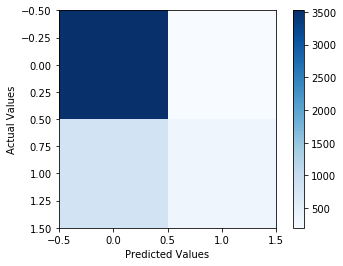

In [11]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()
im = ax.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set( ylabel='Actual Values', xlabel='Predicted Values')

In [12]:
cfm

array([[3523,  199],
       [ 810,  353]], dtype=int64)